# Extract all Velocity Field Data

Extract all velocity field data from Xcompact3D .bin files

In [2]:
# Imports
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
import glob
import os
import xmltodict

In [3]:
# Enter path of x3d data files
PATH = '../simulations/10_intensity/data'

In [4]:
# Join path of x3d data files
X3D_UX_FILES = glob.glob(os.path.join(PATH,"ux*"))                      # Collects all velocity files
X3D_UY_FILES = glob.glob(os.path.join(PATH,"uy*"))
X3D_UZ_FILES = glob.glob(os.path.join(PATH,"uz*"))
X3D_SNAPSHOT_FILE = glob.glob(os.path.join(PATH,"snapshot-001.xdmf"))   # Only need to read one snapshot file

In [5]:
# Enter path of one snapshot file for mesh data
with open(X3D_SNAPSHOT_FILE[0]) as xml_file:
    data_dict = xmltodict.parse(xml_file.read())

In [6]:
# Read mesh data locations
x_read = data_dict['Xdmf']['Domain']['Geometry']['DataItem'][0]['#text']
y_read = data_dict['Xdmf']['Domain']['Geometry']['DataItem'][1]['#text']
z_read = data_dict['Xdmf']['Domain']['Geometry']['DataItem'][2]['#text']

In [7]:
# Read the dimensions of each axis
nx = int(data_dict['Xdmf']['Domain']['Geometry']['DataItem'][0]['@Dimensions'])
ny = int(data_dict['Xdmf']['Domain']['Geometry']['DataItem'][1]['@Dimensions'])
nz = int(data_dict['Xdmf']['Domain']['Geometry']['DataItem'][2]['@Dimensions'])
num_t = len(X3D_UX_FILES)

In [8]:
# Create XYZ grid
x = np.array(x_read.split(),dtype=float)
y = np.array(y_read.split(),dtype=float)
z = np.array(z_read.split(),dtype=float)
X,Y,Z = np.meshgrid(x,y,z,indexing='ij')

In [9]:
# Initialize velocity data matrices
ux = np.empty((nx,ny,nz,num_t))
uy = np.empty((nx,ny,nz,num_t))
uz = np.empty((nx,ny,nz,num_t))

In [10]:
# Extract data from files
for i in range(0,num_t):
    ux_read = np.fromfile(X3D_UX_FILES[i])
    uy_read = np.fromfile(X3D_UY_FILES[i])
    uz_read = np.fromfile(X3D_UZ_FILES[i])


    ux_reshape = ux_read.reshape(nz,ny,nx).transpose()
    uy_reshape = uy_read.reshape(nz,ny,nx).transpose()
    uz_reshape = uz_read.reshape(nz,ny,nx).transpose()

    ux[:,:,:,i] = ux_reshape
    uy[:,:,:,i] = uy_reshape
    uz[:,:,:,i] = uz_reshape

# Plot data to verify

Units of data are: (X, Y, Z, t)

In [14]:
ux.shape

(100, 61, 60, 9)

In [11]:
ux.shape

(100, 61, 60, 9)

Text(0.5, 1.0, 'Python Data')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
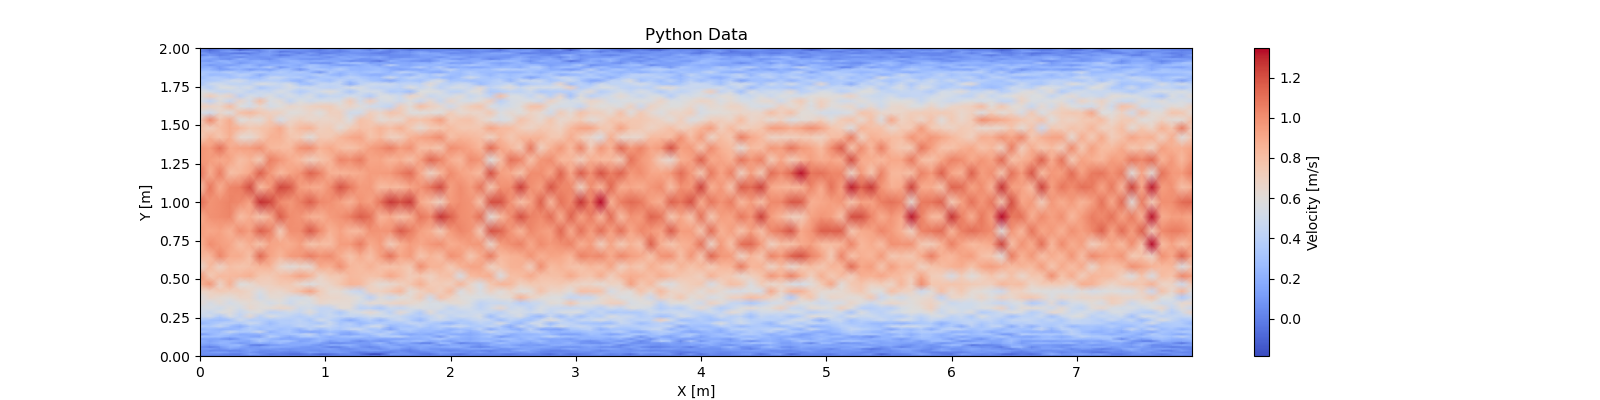

In [15]:
fig = plt.figure(figsize=(16,4))
plt.pcolormesh(X[:,:,30],Y[:,:,30],ux[:,:,32,0], cmap='coolwarm', shading='gouraud')
plt.colorbar(label='Velocity [m/s]')
plt.xlabel('X [m]')
plt.ylabel('Y [m]')
plt.title('Python Data')

Text(0.5, 1.0, 'Paraview Data')

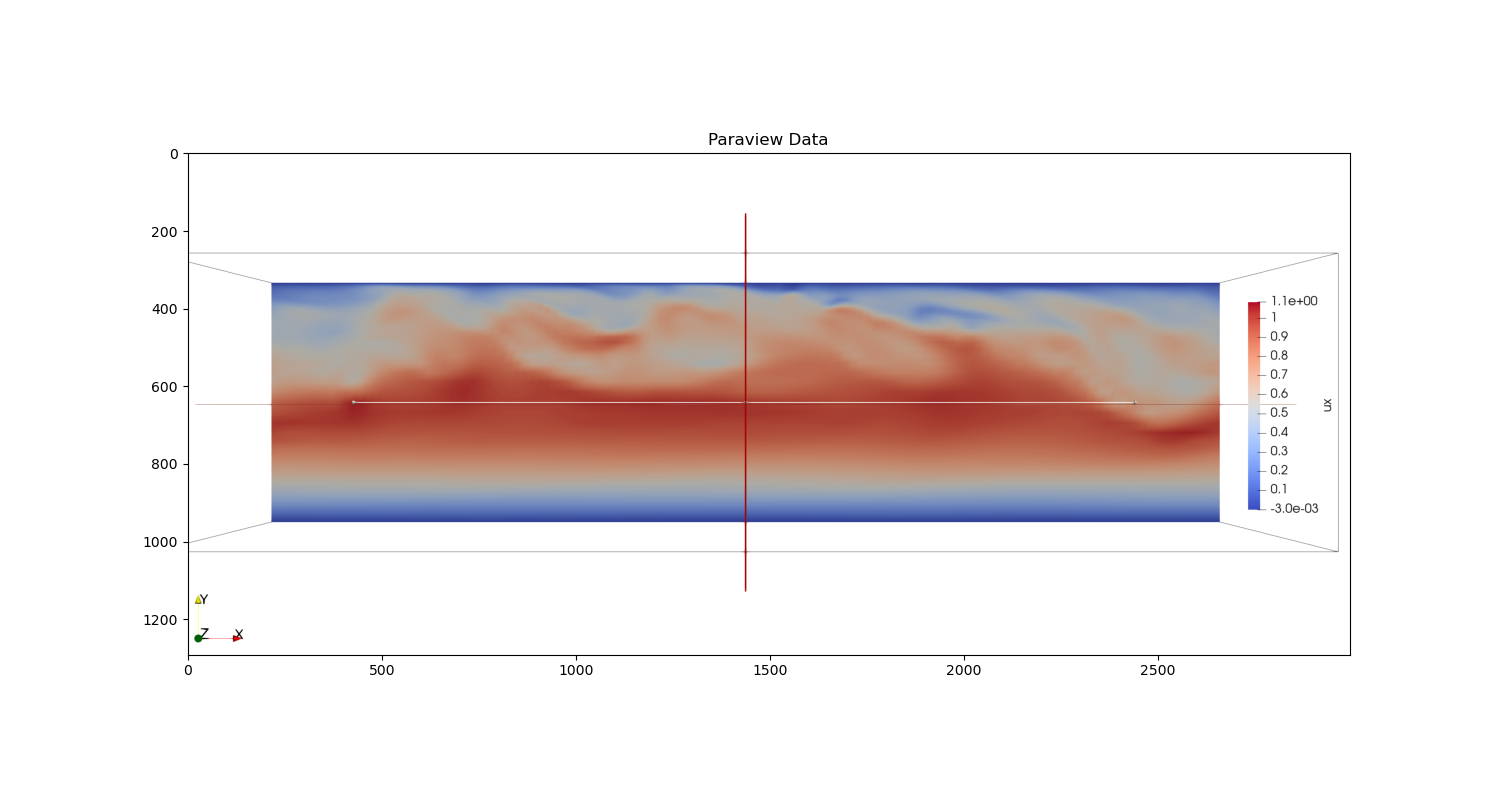

In [26]:
fig = plt.figure(figsize=(15,8))
plt.imshow(plt.imread('pics/ux_XY_plane.PNG'))
plt.title('Paraview Data')

Text(0.5, 1.0, 'Python Data')

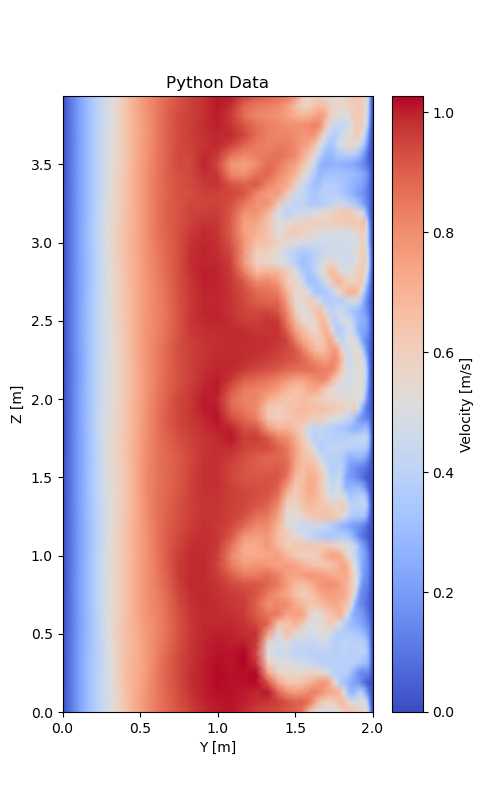

In [52]:
fig = plt.figure(figsize=(5,8))
plt.pcolormesh(Y[64,:,:],Z[64,:,:],ux[64,:,:,3], cmap='coolwarm', shading='gouraud')
plt.colorbar(label='Velocity [m/s]')
plt.xlabel('Y [m]')
plt.ylabel('Z [m]')
plt.title('Python Data')

Text(0.5, 1.0, 'Paraview Data')

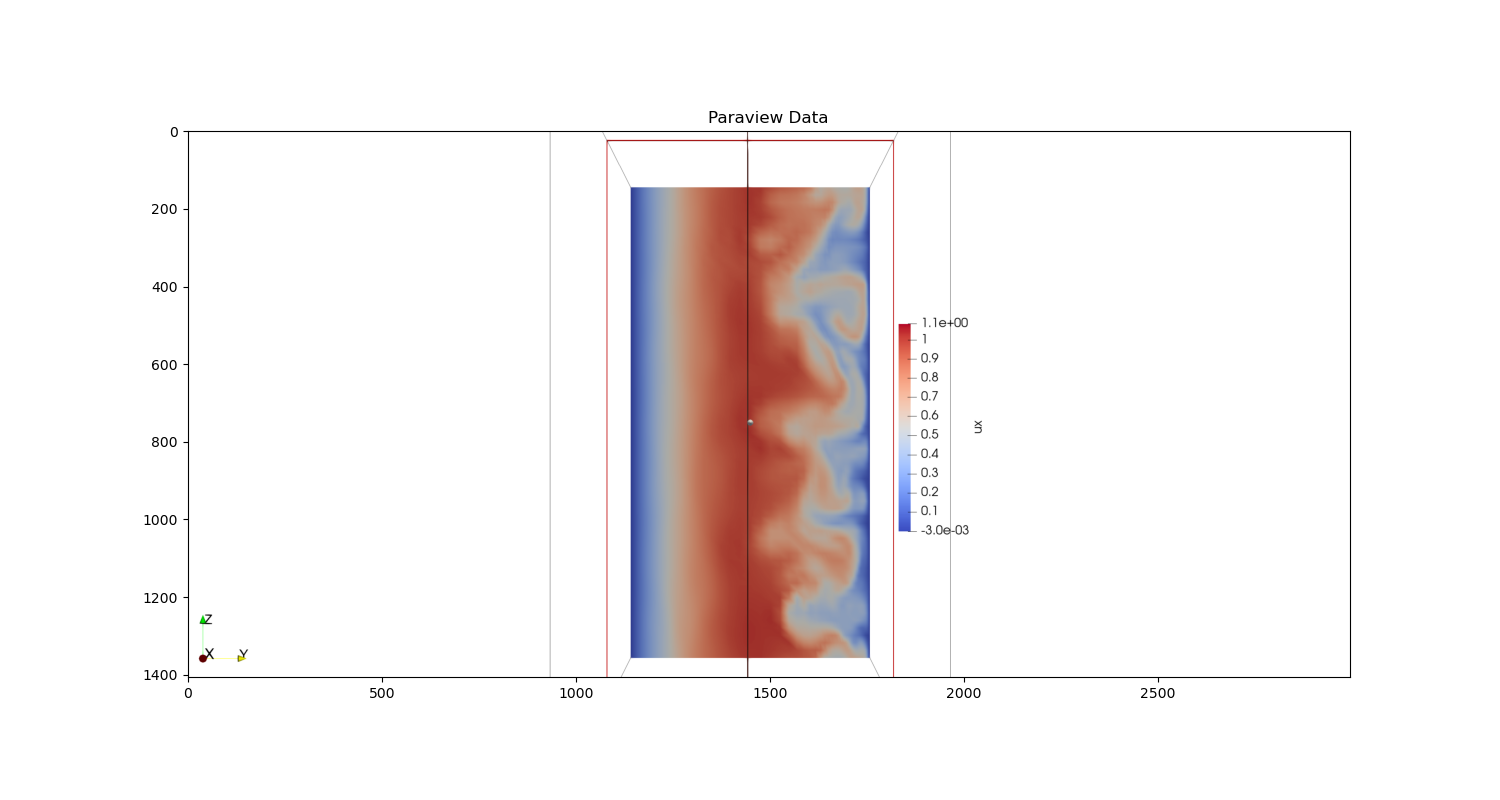

In [23]:
fig = plt.figure(figsize=(15,8))
plt.imshow(plt.imread('pics/ux_YZ_plane.PNG'))
plt.title('Paraview Data')

Text(0.5, 1.0, 'Python Data')

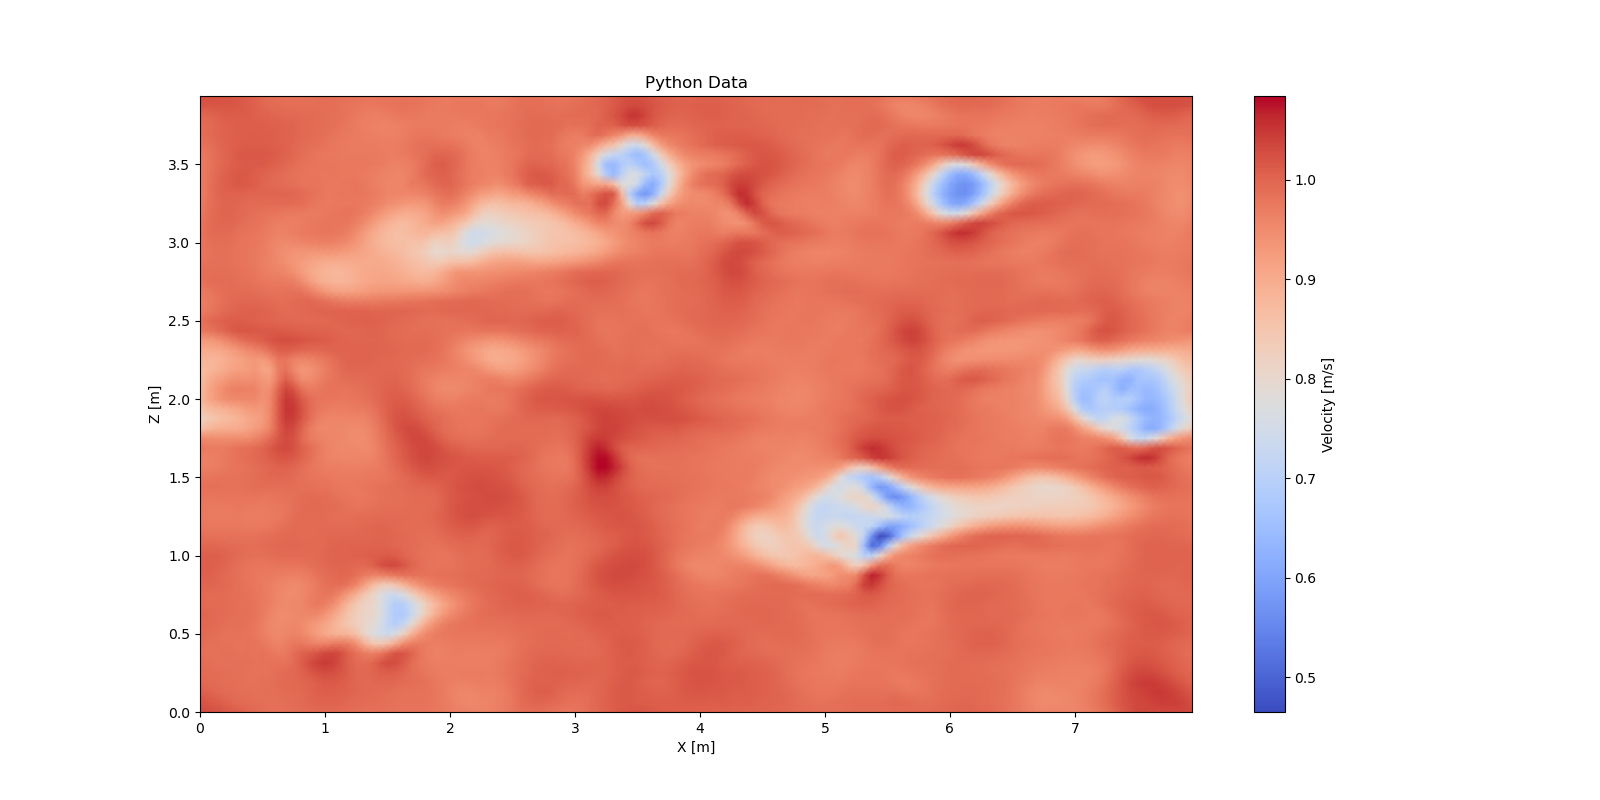

In [53]:
fig = plt.figure(figsize=(16,8))
plt.pcolormesh(X[:,32,:],Z[:,32,:],ux[:,32,:,3], cmap='coolwarm', shading='gouraud')
plt.colorbar(label='Velocity [m/s]')
plt.xlabel('X [m]')
plt.ylabel('Z [m]')
plt.title('Python Data')

Text(0.5, 1.0, 'Paraview Data')

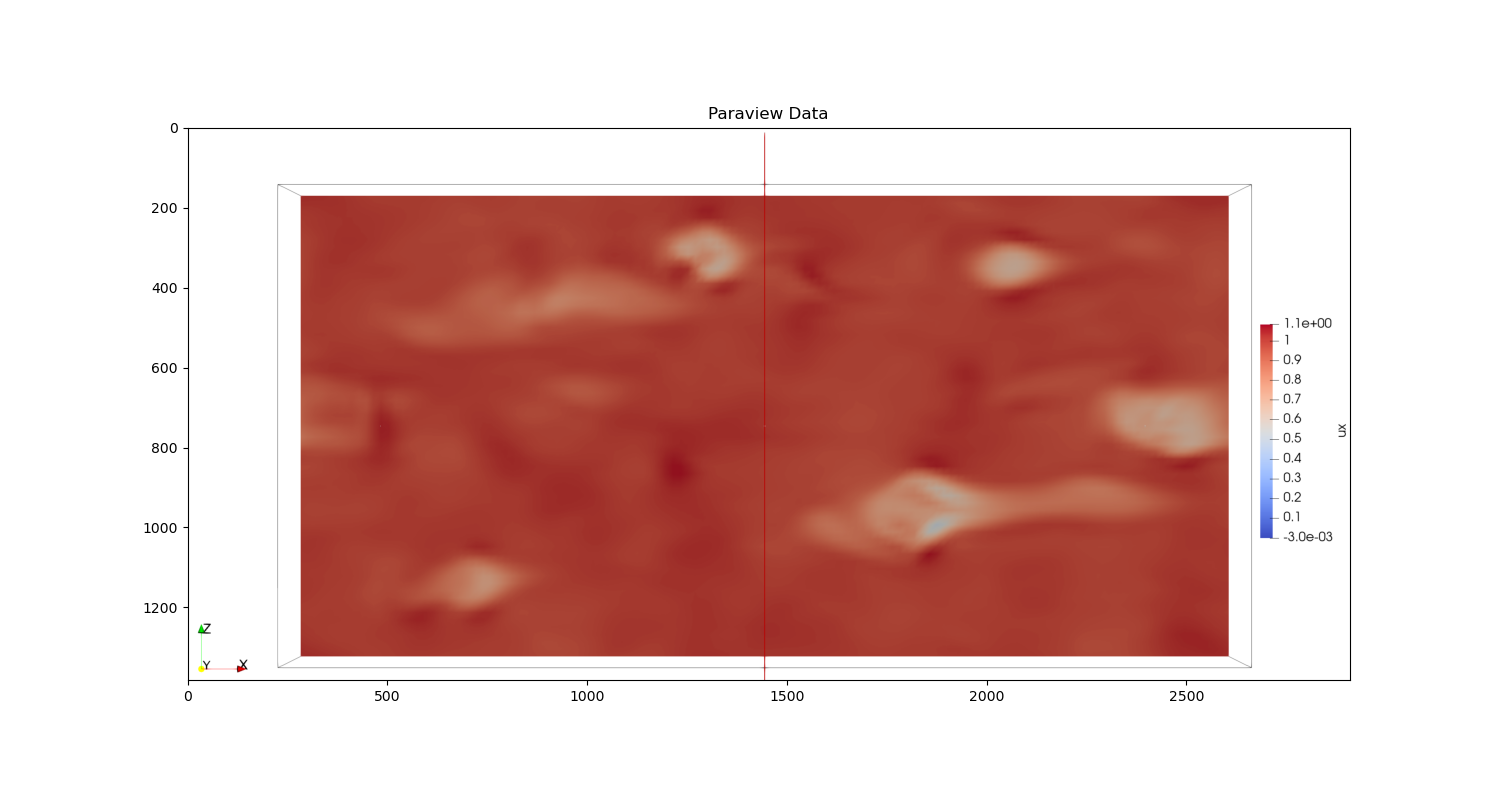

In [21]:
fig = plt.figure(figsize=(15,8))
plt.imshow(plt.imread('pics/ux_XZ_plane.PNG'))
plt.title('Paraview Data')